In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
acidentes = pd.read_parquet('data/acidentes.parquet').astype({'tipo_veiculo': 'object'})

In [3]:
accidents_by_road = acidentes[['br', 'ilesos',
       'feridos_leves', 'feridos_graves', 'mortos']].groupby(['br']).sum().reset_index()
accidents_by_road['total_envolvidos'] = accidents_by_road[['ilesos', 'feridos_leves', 'feridos_graves', 'mortos']].sum(axis=1)
accidents_by_road.rename(columns={'br': 'codigo_br'}, inplace=True)

<Axes: xlabel='count', ylabel='tipo_veiculo'>

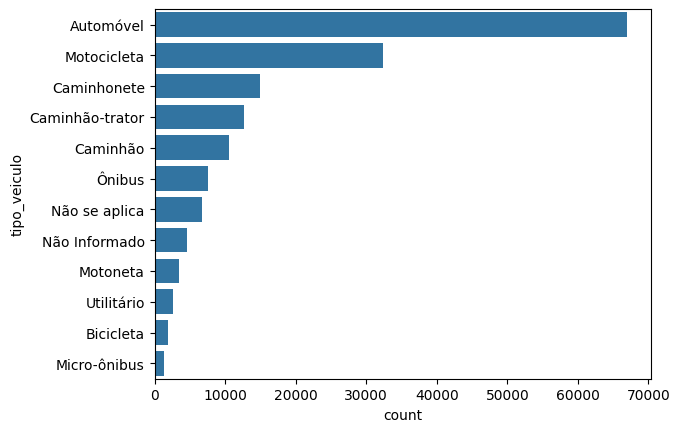

In [4]:
accidents_per_vehicle = acidentes['tipo_veiculo'].value_counts().reset_index() 
_ = accidents_per_vehicle[accidents_per_vehicle['count'] >= 1000].astype({'tipo_veiculo': 'object'})
vehicles_with_many_accidents = _.tipo_veiculo.unique()
sns.barplot(_, x = 'count',y = 'tipo_veiculo')

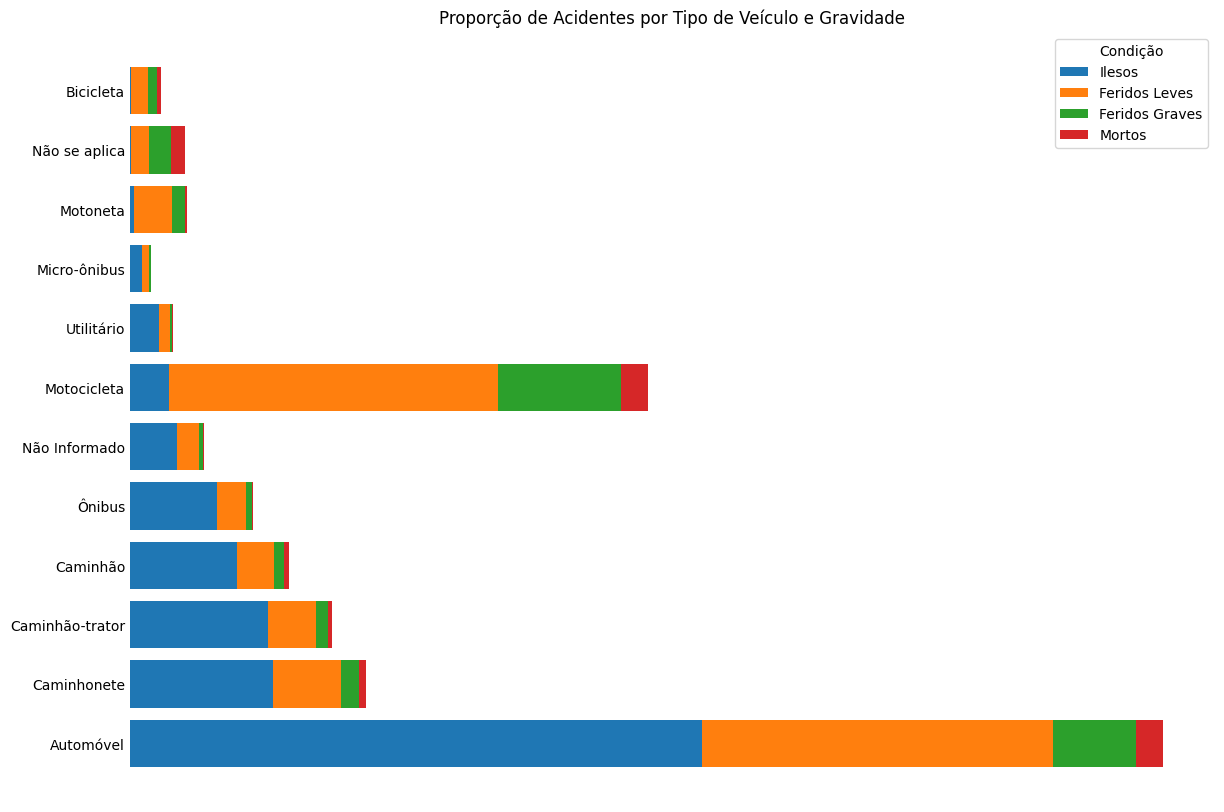

In [5]:
agg_data = acidentes[acidentes.tipo_veiculo.isin(vehicles_with_many_accidents)].groupby('tipo_veiculo')[['ilesos', 'feridos_leves', 'feridos_graves', 'mortos']].sum().reset_index()

# Sort data for better visualization
agg_data = agg_data.sort_values(by=['ilesos', 'feridos_leves', 'feridos_graves', 'mortos'], ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(14, 10))

# Base positions for the bars
bottom = [0] * len(agg_data)

# Colors for each condition
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
conditions = ['ilesos', 'feridos_leves', 'feridos_graves', 'mortos']
labels = ['Ilesos', 'Feridos Leves', 'Feridos Graves', 'Mortos']

# Plot each condition
for i, condition in enumerate(conditions):
    ax.barh(agg_data['tipo_veiculo'], agg_data[condition], left=bottom, color=colors[i], label=labels[i])
    bottom = [i+j for i,j in zip(bottom, agg_data[condition])]

# Adding titles and labels
plt.title('Proporção de Acidentes por Tipo de Veículo e Gravidade')
plt.legend(title='Condição')
plt.xticks([])
plt.tick_params(length = 0)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()
plt.show()

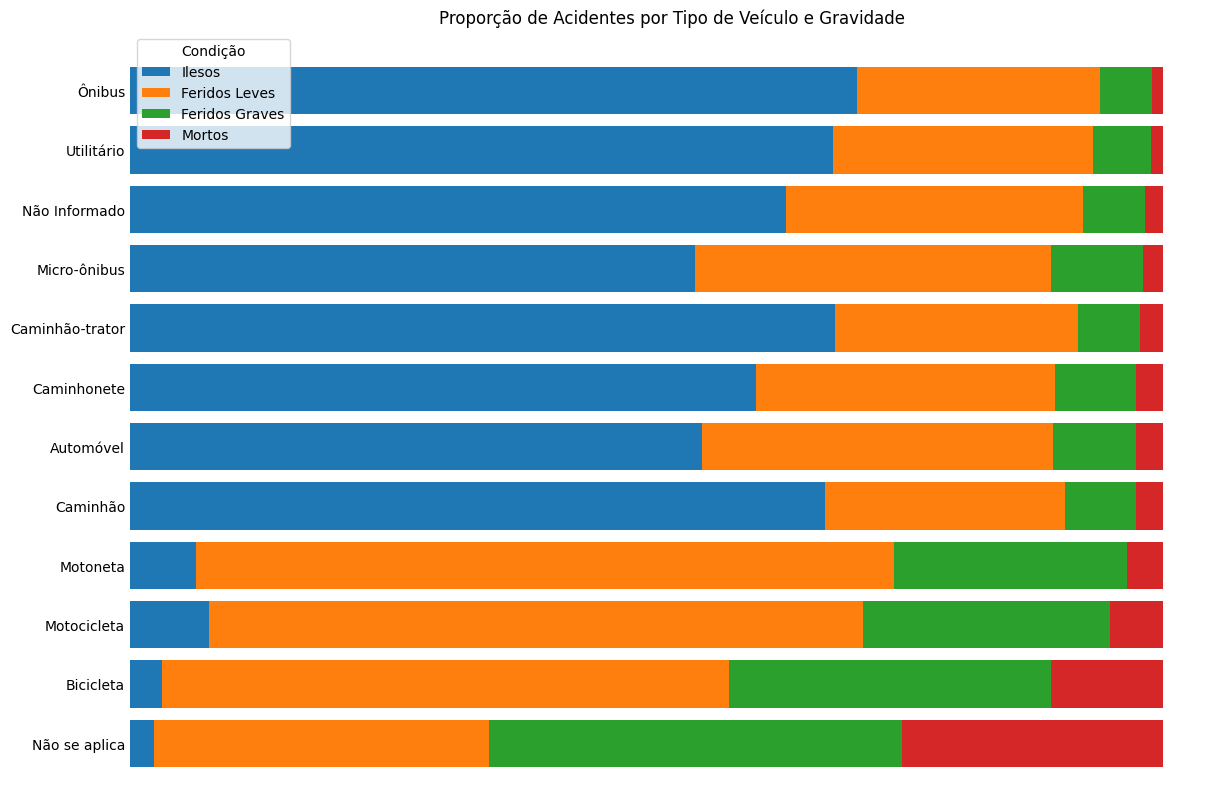

In [6]:
agg_data = acidentes[acidentes.tipo_veiculo.isin(vehicles_with_many_accidents)].groupby('tipo_veiculo')[['ilesos', 'feridos_leves', 'feridos_graves', 'mortos']].sum().reset_index()

agg_data['total'] = agg_data['ilesos'] + agg_data['feridos_leves'] + agg_data['feridos_graves'] + agg_data['mortos']

agg_data['ilesos'] = agg_data['ilesos'] / agg_data['total']
agg_data['feridos_leves'] = agg_data['feridos_leves'] / agg_data['total']
agg_data['feridos_graves'] = agg_data['feridos_graves'] / agg_data['total']
agg_data['mortos'] = agg_data['mortos'] / agg_data['total']

# Ordenar os dados para melhor visualização
agg_data = agg_data.sort_values(by='mortos', ascending=False)

# Plotagem
fig, ax = plt.subplots(figsize=(14, 10))

# Posições base para as barras
bottom = [0] * len(agg_data)

# Cores para cada condição
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
conditions = ['ilesos', 'feridos_leves', 'feridos_graves', 'mortos']
labels = ['Ilesos', 'Feridos Leves', 'Feridos Graves', 'Mortos']

# Plotar cada condição
for i, condition in enumerate(conditions):
    ax.barh(agg_data['tipo_veiculo'], agg_data[condition], left=bottom, color=colors[i], label=labels[i])
    bottom = [i+j for i,j in zip(bottom, agg_data[condition])]

# Adicionar títulos e rótulos
plt.title('Proporção de Acidentes por Tipo de Veículo e Gravidade')
plt.legend(title='Condição')
plt.xticks([])
plt.tick_params(length = 0)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

In [7]:

def vehicle_categorization(row):
        if row.tipo_veiculo in ['Bicicleta',  'Carro de mão', 'Carroça-charrete']:
                return 'very light'
        elif row.tipo_veiculo in ['Motocicleta', 'Motoneta', 'Ciclomotor' ]:
                return 'light'
        elif row.tipo_veiculo in ['Automóvel', 'Quadriciclo', 'Triciclo']:
                return 'medium'
        elif row.tipo_veiculo in ['Caminhonete', 'Micro-ônibus', 'Utilitário']:
                return 'heavy'
        elif row.tipo_veiculo in ['Caminhão', 'Caminhão-trator', 'Reboque', 'Semireboque', 'Trem-bonde', 'Trator misto', 'Trator de esteira',  'Chassi-plataforma', 'Trator de rodas', 'Ônibus' ]:
                return 'very heavy'
        else: #'Não se aplica' 'Outros' 'Não Informado' 
                return np.nan
acidentes['vehicle_category'] = acidentes.apply(vehicle_categorization, axis = 1)

In [8]:
cols = ['id', 'vehicle_category', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos']

mean_by_category = acidentes[cols].groupby(cols[:-4]).mean().reset_index()
categories_per_accident = mean_by_category[cols[:2]].groupby('id').count()
accidents_with_2_categories = categories_per_accident[categories_per_accident == 2].dropna().index.to_list()
accidents_with_2_categories

[496535,
 496538,
 496549,
 496560,
 496569,
 496573,
 496582,
 496592,
 496593,
 496594,
 496597,
 496601,
 496605,
 496611,
 496615,
 496619,
 496624,
 496625,
 496627,
 496628,
 496632,
 496633,
 496641,
 496648,
 496653,
 496656,
 496659,
 496661,
 496664,
 496666,
 496669,
 496672,
 496677,
 496678,
 496681,
 496684,
 496687,
 496692,
 496693,
 496694,
 496695,
 496701,
 496708,
 496711,
 496721,
 496727,
 496728,
 496732,
 496733,
 496747,
 496748,
 496750,
 496751,
 496759,
 496760,
 496763,
 496767,
 496772,
 496778,
 496780,
 496781,
 496782,
 496783,
 496787,
 496789,
 496792,
 496795,
 496798,
 496799,
 496810,
 496812,
 496814,
 496817,
 496818,
 496822,
 496825,
 496827,
 496831,
 496834,
 496836,
 496842,
 496845,
 496847,
 496850,
 496854,
 496855,
 496856,
 496859,
 496860,
 496861,
 496864,
 496866,
 496867,
 496869,
 496874,
 496876,
 496877,
 496884,
 496885,
 496887,
 496890,
 496891,
 496902,
 496906,
 496908,
 496912,
 496926,
 496927,
 496930,
 496938,
 496939,
 

In [9]:
mean_by_2_categories = mean_by_category[mean_by_category.id.isin(accidents_with_2_categories)]

/tmp/ipykernel_1415/2953783873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_by_2_categories['vehicle_number'] = mean_by_2_categories.groupby('id').cumcount() + 1
/tmp/ipykernel_1415/2953783873.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_by_2_categories['vehicle_weight'] = mean_by_2_categories['vehicle_category'].map(category_weight)


<Axes: xlabel='d_category', ylabel='mortos'>

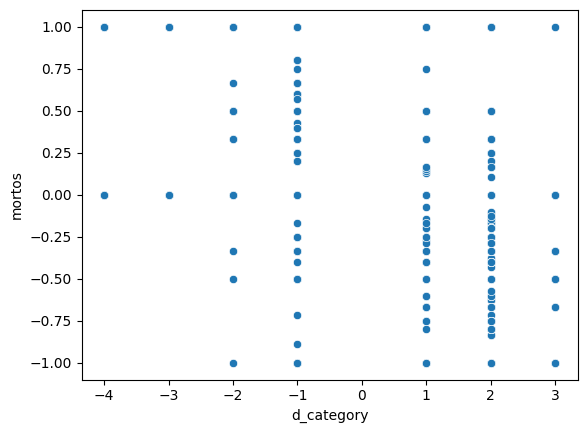

In [10]:
mean_by_2_categories['vehicle_number'] = mean_by_2_categories.groupby('id').cumcount() + 1

category_weight = {
    'very light': 0,
    'light': 1,
    'medium': 2,
    'heavy': 3,
    'very heavy': 4
}

# Map vehicle categories to weights
mean_by_2_categories['vehicle_weight'] = mean_by_2_categories['vehicle_category'].map(category_weight)
mean_by_2_categories = mean_by_2_categories.sort_values(['id', 'vehicle_weight'])

# Pivot the data
pivot_df = mean_by_2_categories.pivot(index='id', columns='vehicle_number', values=['vehicle_weight', 'mortos'])

# Flatten the MultiIndex columns
pivot_df.columns = [f'{i}_{j}' for i, j in pivot_df.columns]

# Reset index to make accident_id a column again
pivot_df.reset_index(inplace=True)
pivot_df['mortos'] = pivot_df.mortos_2 - pivot_df.mortos_1 
pivot_df['d_category'] = pivot_df.vehicle_weight_2 - pivot_df.vehicle_weight_1 
sns.scatterplot(pivot_df, x = 'd_category', y = 'mortos')

# Plots de mapas

In [11]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(acidentes['longitude'], acidentes['latitude'])]
gdf_accidents = gpd.GeoDataFrame(acidentes, geometry=geometry)
gdf_accidents = gdf_accidents.set_crs(epsg=4326, inplace=True).to_crs(epsg=32723)

In [15]:
roads = gpd.read_parquet('data/roads.parquet')
roads.codigo_br =roads.codigo_br.astype('int16')
roads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   codigo_br      7409 non-null   int16   
 1   unidade_fe     7409 non-null   object  
 2   quilometra     7409 non-null   float64 
 3   quilometr0     7409 non-null   float64 
 4   extensao       7409 non-null   float64 
 5   superficie     7409 non-null   object  
 6   obra           7409 non-null   object  
 7   unidade_lo     7409 non-null   object  
 8   Shape__Length  7409 non-null   float64 
 9   geometry       7409 non-null   geometry
dtypes: float64(4), geometry(1), int16(1), object(4)
memory usage: 535.5+ KB


In [16]:
brasil_est =gpd.read_file('data/states-br.json')
brasil_est.head(3)
brasil_est = brasil_est.set_crs(epsg=4326, inplace=True).to_crs(epsg=32723)

In [18]:

buffer_width = 500
gdf_segments = roads.copy().set_crs(epsg=4326, inplace=True).to_crs(epsg=32723)
gdf_segments['geometry'] = gdf_segments['geometry'].buffer(buffer_width)

# Add a column for accident count to the segments GeoDataFrame
gdf_segments['accident_count'] = 0

# Check for intersections manually
for i, segment in gdf_segments.iterrows():
    # Create a boolean mask for accidents within the current segment
    mask = gdf_accidents.within(segment.geometry)
    # Count the number of accidents within the current segment
    accident_count = mask.sum()
    # Update the accident count for the current segment
    gdf_segments.at[i, 'accident_count'] = accident_count

<Axes: >

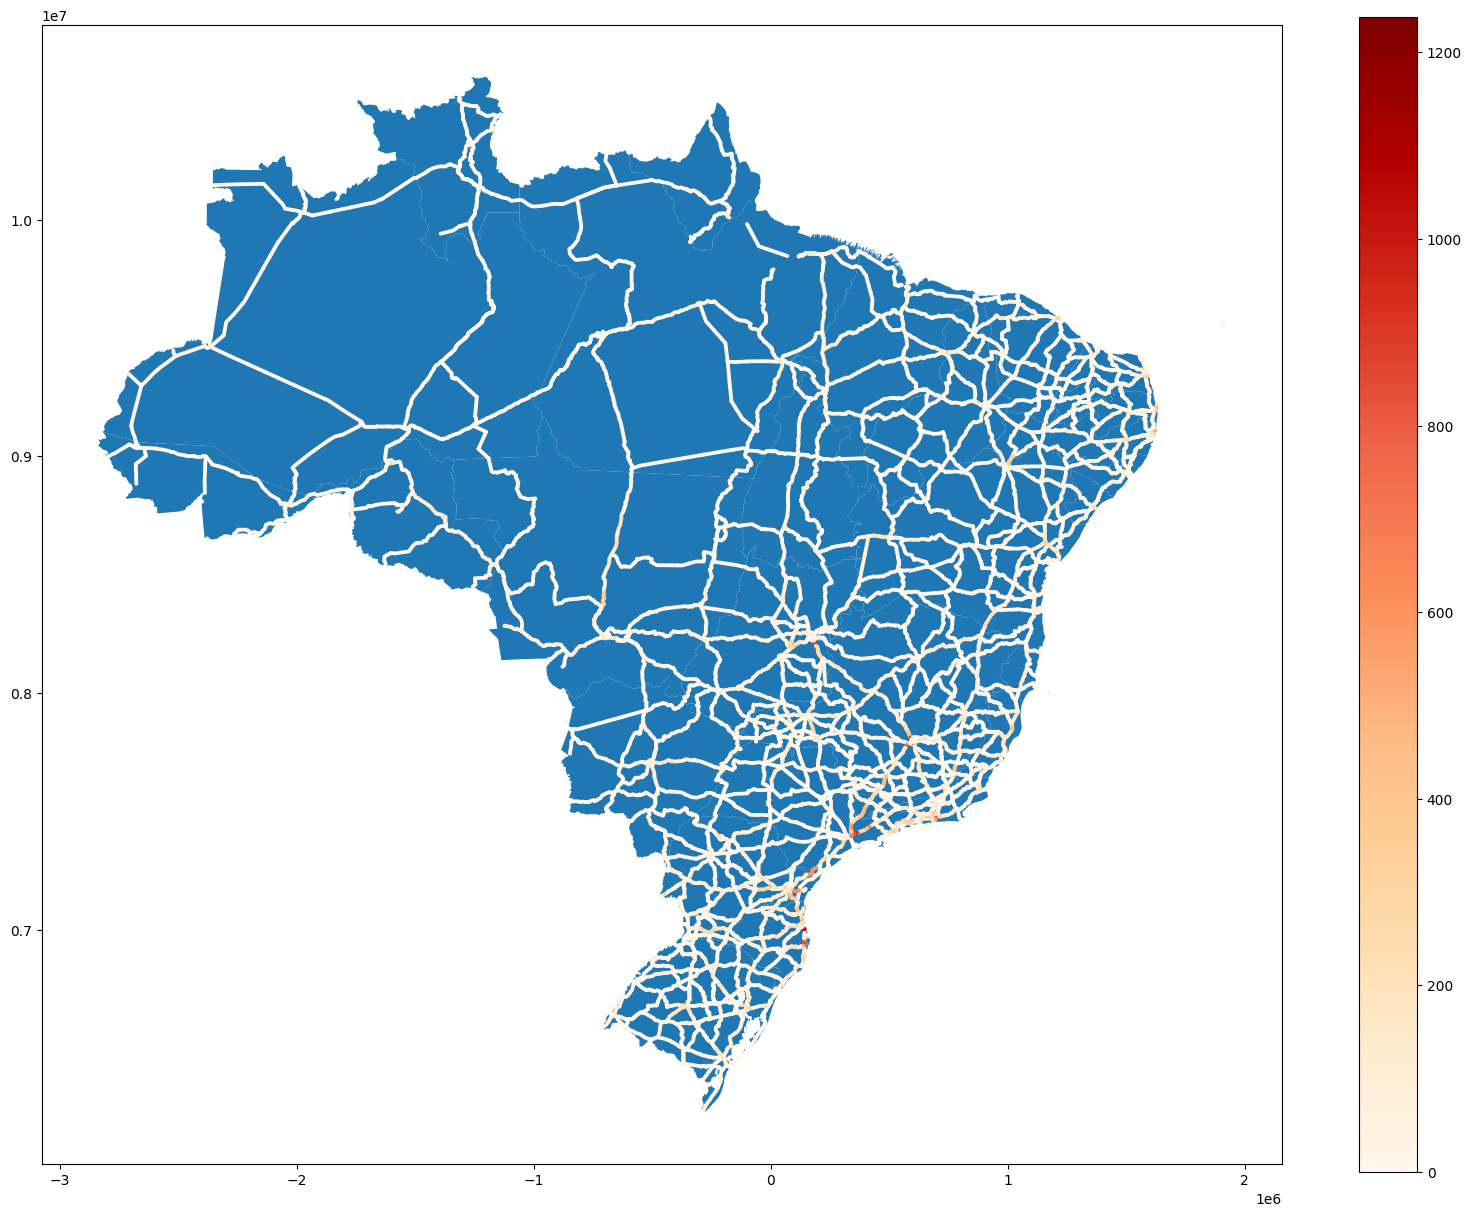

In [20]:
fig, ax = plt.subplots(1,1,figsize = (20, 15))
ax = brasil_est.plot(ax=ax)
buffer_width2 = 8000

gdf_segments.geometry = roads.copy().set_crs(epsg=4326, inplace=True).to_crs(epsg=32723).geometry
gdf_segments['geometry'] = gdf_segments['geometry'].buffer(buffer_width2)
gdf_segments.plot(column='accident_count', legend=True, ax = ax,
                  cmap='OrRd')
